# Coursework Part 2

## In this part, we will continue to work on the dataset you have used and modified in Part one, that is, the red-wine dataset with two classes, where Class One includes those red wine with a quality value in between 6-10 (inclusive) and Class Two includes those red-wine with a quality value in between 1- 5 (inclusive).

In [503]:
import numpy as np
import matplotlib.pyplot as plt                        # Importing Required libraries
import pandas as pd
import seaborn as sns

data = pd.read_csv('winequality-red.csv', sep=';')     # Importing csv file to data variable
data                                                   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [504]:
data.loc[(data['quality']>=6)&(data['quality']<=10),'class'] = 1       # spliting quality with 6-10 in class 1

In [505]:
data.loc[(data['quality']>=1)&(data['quality']<=5),'class'] = 2        # spliting quality with 1-5 in class 2

In [506]:
data.head()                                  # head() dataframe function to view some of initial row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.0


In [507]:
data.info()                        # Information about the type of data and object of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
class                   1599 non-null float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


In [508]:
data.columns            # it describes the columns names in the data

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

## Task 1: Divide the data set into a training set (I) and a test set.   You should further divide the training set (I) into a smaller training set (II)and a validation set using the same ratio.

### label  =  class (which is divided into 0 and 1)

In [509]:
label_values = data['class'].to_numpy()           # Seperating Label column ('class') from the data 
label_values

array([2., 2., 2., ..., 1., 2., 1.])

### features or inputs as target_values which is used to predict the class

In [510]:
target_values = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', # Seperating the target values 
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].to_numpy()
target_values

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [511]:
columns_name = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
columns_name                           

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='<U20')

In [512]:
data.shape            # Represent the number of rows and columns in main data

(1599, 13)

In [513]:
target_values.shape      # Represent the number of rows and columns of features as target_values 

(1599, 11)

In [514]:
label_values.shape       # label shape that is one column

(1599,)

## I had use 20% of the total data points as the test data.

In [515]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( target_values, label_values, test_size=0.2, random_state=101,shuffle='True')

In [516]:
X_train

array([[ 8.2 ,  0.44,  0.24, ...,  3.25,  0.53, 10.2 ],
       [ 8.8 ,  0.61,  0.14, ...,  3.19,  0.59,  9.5 ],
       [ 8.1 ,  0.87,  0.  , ...,  3.25,  0.5 ,  9.8 ],
       ...,
       [ 8.3 ,  0.85,  0.14, ...,  3.36,  0.54, 10.1 ],
       [ 6.3 ,  0.6 ,  0.1 , ...,  3.55,  0.51, 12.1 ],
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.53,  9.7 ]])

In [517]:
X_test

array([[ 8.3  ,  0.78 ,  0.1  , ...,  3.48 ,  0.53 , 10.   ],
       [ 7.5  ,  0.725,  0.04 , ...,  3.26 ,  0.53 ,  9.6  ],
       [ 7.6  ,  0.49 ,  0.33 , ...,  3.41 ,  0.58 ,  9.   ],
       ...,
       [10.4  ,  0.575,  0.61 , ...,  3.16 ,  0.69 ,  9.   ],
       [ 8.7  ,  0.69 ,  0.31 , ...,  3.48 ,  0.74 , 11.6  ],
       [ 7.   ,  0.62 ,  0.18 , ...,  3.08 ,  0.6  ,  9.3  ]])

In [518]:
X_train.shape

(1279, 11)

In [519]:
X_test.shape

(320, 11)

## spliting validation set from training set with same ratio above

In [520]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=421, shuffle=True)

In [521]:
X_trn

array([[10.5 ,  0.42,  0.66, ...,  3.24,  0.75, 11.7 ],
       [ 5.6 ,  0.66,  0.  , ...,  3.71,  0.63, 12.8 ],
       [ 8.2 ,  0.42,  0.49, ...,  3.34,  0.75,  8.7 ],
       ...,
       [ 6.5 ,  0.39,  0.23, ...,  3.44,  0.55, 12.1 ],
       [10.2 ,  0.54,  0.37, ...,  3.18,  0.77,  9.  ],
       [ 8.2 ,  0.73,  0.21, ...,  3.2 ,  0.52,  9.5 ]])

In [522]:
X_trn.shape


(959, 11)

In [523]:
import collections, numpy
unique_labels = numpy.unique(label_values)

In [524]:
unique_labels

array([1., 2.])

# Task 2: PCA Analysis on the red-wine two classes dataset

## a) Perform a PCA analysis on the training data set (I)

### preprocessing data

In [525]:
from sklearn.preprocessing import StandardScaler
scaler_train_set = StandardScaler().fit_transform(X_train)
scaler_train_set

array([[-0.078, -0.487, -0.177, ..., -0.387, -0.77 , -0.189],
       [ 0.265,  0.465, -0.691, ..., -0.771, -0.42 , -0.856],
       [-0.135,  1.921, -1.411, ..., -0.387, -0.945, -0.57 ],
       ...,
       [-0.021,  1.809, -0.691, ...,  0.318, -0.712, -0.284],
       [-1.163,  0.409, -0.897, ...,  1.535, -0.887,  1.623],
       [-0.649,  0.521, -1.102, ...,  1.279, -0.77 , -0.665]])

In [526]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(scaler_train_set)
PC_ALL_Variance = pca.explained_variance_
PC_ALL_Variance

array([3.119, 1.951, 1.496, 1.234, 0.959, 0.668, 0.58 , 0.41 , 0.349,
       0.18 , 0.06 ])

## b) Plot the training data in the PC1 and PC2 projection and label the data in the picture according to its class

In [527]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaler_train_set)
x_pca

array([[-0.244, -0.831],
       [-0.027,  0.102],
       [-1.254,  0.319],
       ...,
       [-0.927,  0.77 ],
       [-3.175, -1.655],
       [-1.556,  1.359]])

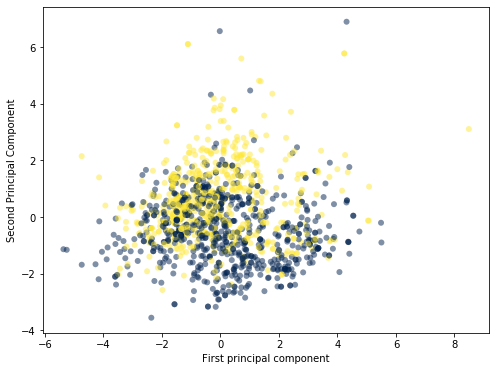

In [528]:
plt.figure(figsize=(8,6))
marker = ['class1','class2']
plt.scatter(x_pca[:,0],x_pca[:,1], c=y_train ,cmap='cividis',edgecolor='none',label=marker, alpha= 0.5)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()


In [529]:
pca.components_

array([[ 0.49 , -0.24 ,  0.464,  0.13 ,  0.207, -0.065, -0.002,  0.395,
        -0.437,  0.253, -0.108],
       [-0.091,  0.273, -0.135,  0.278,  0.167,  0.505,  0.566,  0.243,
        -0.014, -0.035, -0.397]])

In [530]:
PC1_variance = pca.explained_variance_[0]
PC1_variance

3.1190284477160297

In [531]:
PC2_variance = pca.explained_variance_[1]
PC2_variance

1.9514828294507311

In [532]:
Variance_ratio = pca.explained_variance_ratio_
Variance_ratio

array([0.283, 0.177])

## c) Report variances captured by each principal component 

In [533]:
PC_ALL_Variance = pca.explained_variance_
PC_ALL_Variance

array([3.119, 1.951])

## Task 3: Do a classification using the logistic regression model 

### a) In your report, describe the model you have used, including :
What is the cost function? You need to give a mathematical expression describing it. Which optimization algorithm has been used in your code?
Did you use a regularisation term? If you used one, what is it?

In [534]:
from sklearn.linear_model import SGDClassifier
optimize = SGDClassifier(max_iter=100, tol=1e-3, eta0=0.1 ,penalty = "l2")
optimize.fit(scaled_trnX, y_train)

# print the coefficients
print('The intercept =',optimize.intercept_)
print('The trained coefficients are:',optimize.coef_)

# predict for the test set
y_pred_SDG = optimize.predict(scaled_tstX)
y_pred_SDG

The intercept = [-0.424]
The trained coefficients are: [[-0.038  1.067  0.334 -0.408 -0.306 -0.345  0.852 -0.008  0.376 -0.156
  -1.193]]


array([2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
       2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2.,
       2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
       2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
       2., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1.,
       2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 2.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1.,
       1., 2., 1., 1., 1.

## c) Train the model on the training set and report the performance on the test set including accuracy rate and results obtained using the misPatterns function you have defined in b). 

In [535]:
import collections, numpy

unique_labels = numpy.unique(label_values)
print('Unique labels in the dataset are:', unique_labels)

num_in_each_class_in_training = collections.Counter(y_train)
print('Number of instances in each class in the trainig set:', num_in_each_class_in_training)
num_in_each_class_in_test = collections.Counter(y_test)
print('Number of instances in each class in the test set:',num_in_each_class_in_test) 

Unique labels in the dataset are: [1. 2.]
Number of instances in each class in the trainig set: Counter({1.0: 691, 2.0: 588})
Number of instances in each class in the test set: Counter({1.0: 164, 2.0: 156})


In [536]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_train)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trnX = scaler.transform(X_train)      
scaled_tstX = scaler.transform(X_test) 

print(scaled_trnX.shape, scaled_tstX.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [537]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression().fit(scaled_trnX,y_train)

y_prob = logis_reg.predict_proba(scaled_tstX)
y_pred = logis_reg.predict(scaled_tstX)
print('The intercept =',logis_reg.intercept_)

The intercept = [-0.279]


In [538]:
y_pred.shape

(320,)

In [539]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.71875


In [540]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[122,  42],
       [ 48, 108]])

Text(0.5, 257.44, 'Predicted label')

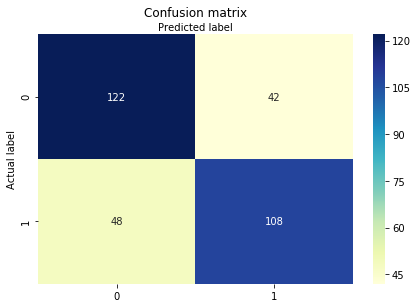

In [541]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## b) Define your own function ([num1, num2]=misPatterns(predictions, labels)) using Python: the inputs of this function are predictions and labels; and the outputs of this function are the number (num1) of misclassified patterns whose label is 1 but prediction is 2, and the number (num2) of misclassified patterns whose label is 2 but prediction is 1.

In [542]:

def misPatterns(y_pred,y_test):
    count=0;num1=0;num2=0;
    for i in range(y_test.shape[0]):
        if(y_pred[i]!=y_test[i]):
            if(y_pred[i]==2):
                num1+=1
                print('predected  ',y_pred[i],'  Label',y_test[i],'num1')
            if(y_pred[i]==1):
                num2+=1
                print('predected  ',y_pred[i],'  Label',y_test[i],'num2')
        else:
            print('predected  ',y_pred[i],'  Label',y_test[i],'True')
       
        count+= 1
    return [num1,num2]

In [543]:
misPatterns(y_pred,y_test)

predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   2.0   Label 1.0 num1
predected   1.0   Label 1.0 True
predected   1.0   Label 1.0 True
predected   1.0   Label 2.0 num2
predected   1.0   Label 1.0 True
predected   1.0   Label 1.0 True
predected   1.0   Label 2.0 num2
predected   1.0   Label 1.0 True
predected   1.0   Label 2.0 num2
predected   1.0   Label 2.0 num2
predected   2.0   Label 2.0 True
predected   2.0   Label 1.0 num1
predected   2.0   Label 2.0 True
predected   1.0   Label 2.0 num2
predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   1.0   Label 1.0 True
predected   1.0   Label 1.0 True
predected   1.0   Label 1.0 True
predected   2.0   Label 1.0 num1
predected   1.0   Label 2.0 num2
predected   1.0   Label 2.0 num2
predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   1.0   Label 2.0 num2
predected   1.0   Label 1.0 True
predected   2.0   Label 1.0 num1
predected 

predected   2.0   Label 2.0 True
predected   1.0   Label 1.0 True
predected   2.0   Label 1.0 num1
predected   2.0   Label 1.0 num1
predected   1.0   Label 1.0 True
predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   2.0   Label 1.0 num1
predected   1.0   Label 1.0 True
predected   2.0   Label 1.0 num1
predected   1.0   Label 1.0 True
predected   1.0   Label 2.0 num2
predected   2.0   Label 2.0 True
predected   1.0   Label 2.0 num2
predected   1.0   Label 1.0 True
predected   1.0   Label 1.0 True
predected   2.0   Label 2.0 True
predected   2.0   Label 1.0 num1
predected   2.0   Label 2.0 True
predected   2.0   Label 1.0 num1
predected   2.0   Label 2.0 True
predected   2.0   Label 2.0 True
predected   1.0   Label 1.0 True
predected   2.0   Label 2.0 True


[42, 48]

## Task 4: Investigate how the size of the training dataset affects the model performance on the test set

In [544]:
import collections, numpy

unique_labels = numpy.unique(label_values)
print('Unique labels in the dataset are:', unique_labels)

num_in_each_class_in_training = collections.Counter(y_trn)
print('Number of instances in each class in the trainig set:', num_in_each_class_in_training)
num_in_each_class_in_test = collections.Counter(y_val)
print('Number of instances in each class in the test set:',num_in_each_class_in_test) 

Unique labels in the dataset are: [1. 2.]
Number of instances in each class in the trainig set: Counter({1.0: 525, 2.0: 434})
Number of instances in each class in the test set: Counter({1.0: 166, 2.0: 154})


In [545]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_trn)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trn_X = scaler.transform(X_trn)      
scaled_val_X = scaler.transform(X_val) 

print(scaled_trn_X.shape, scaled_val_X.shape, y_trn.shape, y_val.shape)

(959, 11) (320, 11) (959,) (320,)


In [546]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression().fit(scaled_trn_X,y_trn)

y_prob = logis_reg.predict_proba(scaled_val_X)
y_pred = logis_reg.predict(scaled_val_X)
print('The intercept =',logis_reg.intercept_)

The intercept = [-0.299]


In [547]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))


Accuracy: 0.746875


# learning curve for training data

In [548]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve

In [549]:
X = X_trn
y = y_trn

In [550]:
X.shape

(959, 11)

In [551]:
y.shape

(959,)

In [552]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1, 100), verbose=1)

[learning_curve] Training set sizes: [ 86  94 101 109 117 125 133 141 149 156 164 172 180 188 196 203 211 219
 227 235 243 251 258 266 274 282 290 298 305 313 321 329 337 345 353 360
 368 376 384 392 400 407 415 423 431 439 447 455 462 470 478 486 494 502
 509 517 525 533 541 549 557 564 572 580 588 596 604 611 619 627 635 643
 651 659 666 674 682 690 698 706 713 721 729 737 745 753 761 768 776 784
 792 800 808 815 823 831 839 847 855 863]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.0s finished


In [553]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

array([0.723, 0.739, 0.755, 0.773, 0.785, 0.788, 0.785, 0.783, 0.765,
       0.78 , 0.779, 0.752, 0.762, 0.753, 0.767, 0.768, 0.773, 0.771,
       0.749, 0.77 , 0.769, 0.768, 0.767, 0.762, 0.763, 0.752, 0.759,
       0.755, 0.751, 0.753, 0.754, 0.75 , 0.752, 0.754, 0.752, 0.753,
       0.757, 0.757, 0.762, 0.765, 0.754, 0.758, 0.758, 0.76 , 0.758,
       0.756, 0.754, 0.753, 0.751, 0.753, 0.756, 0.756, 0.76 , 0.755,
       0.755, 0.758, 0.761, 0.756, 0.754, 0.755, 0.756, 0.755, 0.753,
       0.754, 0.751, 0.751, 0.753, 0.753, 0.754, 0.753, 0.754, 0.755,
       0.752, 0.753, 0.754, 0.753, 0.755, 0.756, 0.751, 0.755, 0.757,
       0.757, 0.756, 0.758, 0.756, 0.756, 0.753, 0.756, 0.758, 0.757,
       0.759, 0.756, 0.756, 0.758, 0.757, 0.754, 0.755, 0.752, 0.752,
       0.754])

In [554]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.007, 0.013, 0.006, 0.006, 0.005, 0.01 , 0.01 , 0.009, 0.   ,
       0.004, 0.004, 0.004, 0.011, 0.004, 0.007, 0.009, 0.016, 0.009,
       0.002, 0.008, 0.008, 0.004, 0.007, 0.004, 0.003, 0.005, 0.005,
       0.008, 0.005, 0.003, 0.004, 0.004, 0.003, 0.004, 0.004, 0.005,
       0.007, 0.003, 0.006, 0.007, 0.005, 0.009, 0.004, 0.004, 0.005,
       0.006, 0.004, 0.003, 0.004, 0.004, 0.004, 0.005, 0.004, 0.008,
       0.005, 0.003, 0.002, 0.003, 0.005, 0.006, 0.005, 0.005, 0.005,
       0.008, 0.006, 0.005, 0.005, 0.006, 0.007, 0.005, 0.005, 0.004,
       0.005, 0.004, 0.003, 0.005, 0.003, 0.007, 0.006, 0.004, 0.004,
       0.005, 0.003, 0.004, 0.004, 0.003, 0.004, 0.004, 0.004, 0.003,
       0.003, 0.005, 0.004, 0.004, 0.003, 0.003, 0.004, 0.003, 0.004,
       0.003])

In [555]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.717, 0.735, 0.736, 0.736, 0.741, 0.732, 0.736, 0.738, 0.734,
       0.733, 0.746, 0.741, 0.736, 0.735, 0.739, 0.732, 0.742, 0.733,
       0.739, 0.749, 0.746, 0.737, 0.74 , 0.742, 0.739, 0.743, 0.746,
       0.737, 0.742, 0.738, 0.744, 0.739, 0.743, 0.736, 0.737, 0.734,
       0.738, 0.738, 0.742, 0.749, 0.741, 0.741, 0.747, 0.746, 0.751,
       0.747, 0.747, 0.746, 0.748, 0.746, 0.749, 0.746, 0.751, 0.74 ,
       0.751, 0.752, 0.748, 0.746, 0.743, 0.748, 0.752, 0.748, 0.748,
       0.743, 0.744, 0.747, 0.742, 0.751, 0.744, 0.749, 0.747, 0.75 ,
       0.743, 0.748, 0.744, 0.741, 0.746, 0.743, 0.752, 0.748, 0.75 ,
       0.748, 0.748, 0.742, 0.746, 0.75 , 0.743, 0.746, 0.748, 0.747,
       0.752, 0.753, 0.748, 0.744, 0.749, 0.743, 0.747, 0.747, 0.748,
       0.747])

In [556]:
test_std = np.std(test_scores, axis = 1)
test_std

array([0.039, 0.022, 0.032, 0.023, 0.028, 0.025, 0.027, 0.023, 0.022,
       0.021, 0.027, 0.02 , 0.027, 0.03 , 0.026, 0.028, 0.021, 0.021,
       0.021, 0.022, 0.027, 0.026, 0.023, 0.022, 0.022, 0.022, 0.023,
       0.023, 0.028, 0.023, 0.023, 0.035, 0.024, 0.03 , 0.023, 0.026,
       0.029, 0.019, 0.02 , 0.023, 0.018, 0.024, 0.022, 0.024, 0.028,
       0.03 , 0.025, 0.023, 0.023, 0.027, 0.031, 0.026, 0.022, 0.03 ,
       0.031, 0.029, 0.022, 0.027, 0.029, 0.026, 0.025, 0.027, 0.027,
       0.038, 0.028, 0.033, 0.029, 0.023, 0.024, 0.027, 0.03 , 0.019,
       0.032, 0.025, 0.027, 0.02 , 0.025, 0.027, 0.023, 0.028, 0.024,
       0.022, 0.025, 0.023, 0.026, 0.025, 0.023, 0.022, 0.025, 0.027,
       0.024, 0.032, 0.032, 0.025, 0.028, 0.025, 0.029, 0.031, 0.024,
       0.026])

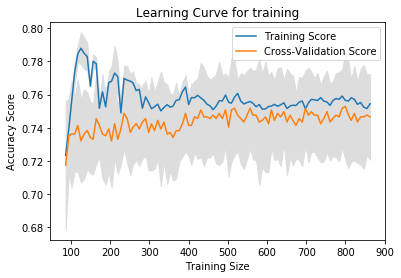

In [557]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')



plt.title('Learning Curve for training')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

# Learning curve for validation set

In [558]:
X_val_curve = X_val
y_val_curve = y_val

In [559]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_val_curve, y_val_curve, cv = 10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1, 100), verbose=1)

[learning_curve] Training set sizes: [ 28  31  34  36  39  41  44  47  49  52  54  57  60  62  65  68  70  73
  75  78  81  83  86  89  91  94  96  99 102 104 107 109 112 115 117 120
 123 125 128 130 133 136 138 141 144 146 149 151 154 157 159 162 164 167
 170 172 175 178 180 183 185 188 191 193 196 198 201 204 206 209 212 214
 217 219 222 225 227 230 233 235 238 240 243 246 248 251 253 256 259 261
 264 267 269 272 274 277 280 282 285 288]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.8s finished


In [560]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

array([0.793, 0.803, 0.818, 0.806, 0.795, 0.8  , 0.807, 0.796, 0.802,
       0.769, 0.778, 0.758, 0.748, 0.768, 0.778, 0.775, 0.771, 0.773,
       0.771, 0.764, 0.753, 0.737, 0.75 , 0.766, 0.732, 0.756, 0.747,
       0.723, 0.737, 0.726, 0.745, 0.717, 0.713, 0.723, 0.738, 0.718,
       0.737, 0.736, 0.733, 0.738, 0.735, 0.737, 0.753, 0.733, 0.744,
       0.743, 0.746, 0.75 , 0.743, 0.736, 0.746, 0.735, 0.739, 0.735,
       0.74 , 0.733, 0.738, 0.738, 0.743, 0.734, 0.731, 0.732, 0.736,
       0.741, 0.746, 0.743, 0.741, 0.743, 0.744, 0.746, 0.735, 0.738,
       0.741, 0.732, 0.745, 0.737, 0.741, 0.73 , 0.731, 0.731, 0.737,
       0.744, 0.745, 0.746, 0.741, 0.757, 0.745, 0.736, 0.742, 0.744,
       0.739, 0.736, 0.741, 0.741, 0.736, 0.731, 0.732, 0.73 , 0.737,
       0.736])

In [561]:
train_std = np.std(train_scores, axis = 1)
train_std

array([0.021, 0.01 , 0.018, 0.012, 0.   , 0.01 , 0.023, 0.027, 0.037,
       0.042, 0.038, 0.038, 0.031, 0.027, 0.024, 0.042, 0.034, 0.028,
       0.027, 0.049, 0.038, 0.031, 0.033, 0.026, 0.02 , 0.025, 0.024,
       0.034, 0.027, 0.022, 0.021, 0.024, 0.027, 0.024, 0.027, 0.019,
       0.025, 0.019, 0.018, 0.013, 0.012, 0.012, 0.014, 0.011, 0.01 ,
       0.019, 0.014, 0.014, 0.009, 0.012, 0.01 , 0.013, 0.014, 0.012,
       0.015, 0.012, 0.014, 0.018, 0.017, 0.014, 0.01 , 0.013, 0.011,
       0.01 , 0.014, 0.011, 0.015, 0.01 , 0.011, 0.012, 0.014, 0.016,
       0.012, 0.011, 0.014, 0.012, 0.011, 0.012, 0.012, 0.012, 0.02 ,
       0.019, 0.011, 0.013, 0.019, 0.011, 0.015, 0.015, 0.011, 0.011,
       0.011, 0.012, 0.01 , 0.012, 0.01 , 0.01 , 0.015, 0.012, 0.014,
       0.014])

In [562]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.631, 0.634, 0.637, 0.647, 0.628, 0.662, 0.669, 0.672, 0.672,
       0.678, 0.678, 0.675, 0.678, 0.694, 0.697, 0.688, 0.697, 0.684,
       0.694, 0.7  , 0.691, 0.703, 0.7  , 0.697, 0.697, 0.694, 0.691,
       0.684, 0.703, 0.694, 0.694, 0.697, 0.694, 0.7  , 0.719, 0.706,
       0.709, 0.722, 0.716, 0.722, 0.703, 0.713, 0.722, 0.709, 0.706,
       0.697, 0.713, 0.719, 0.706, 0.719, 0.716, 0.706, 0.703, 0.694,
       0.703, 0.706, 0.722, 0.722, 0.709, 0.709, 0.703, 0.713, 0.716,
       0.703, 0.722, 0.7  , 0.719, 0.725, 0.716, 0.722, 0.7  , 0.709,
       0.713, 0.703, 0.713, 0.706, 0.703, 0.709, 0.706, 0.709, 0.706,
       0.706, 0.706, 0.719, 0.716, 0.706, 0.716, 0.713, 0.709, 0.719,
       0.709, 0.713, 0.728, 0.709, 0.713, 0.719, 0.725, 0.709, 0.722,
       0.728])

In [563]:
test_std = np.std(test_scores, axis = 1)
test_std

array([0.056, 0.063, 0.067, 0.084, 0.103, 0.086, 0.076, 0.097, 0.103,
       0.096, 0.102, 0.095, 0.093, 0.081, 0.09 , 0.087, 0.094, 0.081,
       0.078, 0.079, 0.093, 0.092, 0.078, 0.101, 0.106, 0.101, 0.077,
       0.09 , 0.097, 0.081, 0.092, 0.086, 0.092, 0.09 , 0.085, 0.083,
       0.084, 0.081, 0.08 , 0.075, 0.081, 0.08 , 0.08 , 0.082, 0.081,
       0.069, 0.072, 0.083, 0.072, 0.084, 0.08 , 0.076, 0.095, 0.074,
       0.074, 0.084, 0.073, 0.077, 0.077, 0.069, 0.085, 0.076, 0.09 ,
       0.092, 0.071, 0.089, 0.087, 0.08 , 0.078, 0.073, 0.09 , 0.086,
       0.094, 0.085, 0.088, 0.091, 0.082, 0.079, 0.081, 0.086, 0.079,
       0.084, 0.079, 0.071, 0.081, 0.079, 0.086, 0.065, 0.075, 0.07 ,
       0.086, 0.076, 0.082, 0.077, 0.076, 0.068, 0.075, 0.078, 0.077,
       0.074])

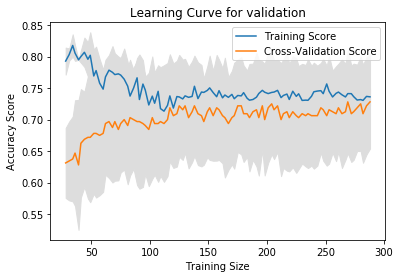

In [564]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = '#DDDDDD')



plt.title('Learning Curve for validation')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

# 4 c) Report the performance on the test set obtained using the model trained from the best size (3 marks).

In [565]:
X_train, X_test, y_train, y_test = train_test_split( target_values, label_values, test_size=0.25,
                                                    random_state=101,shuffle='True')

In [566]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split( X_train, y_train, test_size=0.33, random_state=101,shuffle='True')

In [567]:
X_train_best.shape

(803, 11)

In [568]:
y_test_best.shape

(396,)

In [569]:
X_train.shape

(1199, 11)

In [570]:
y_train.shape

(1199,)

In [571]:
import collections, numpy

unique_labels = numpy.unique(label_values)
print('Unique labels in the dataset are:', unique_labels)

num_in_each_class_in_training = collections.Counter(y_train_best)
print('Number of instances in each class in the trainig set:', num_in_each_class_in_training)
num_in_each_class_in_test = collections.Counter(y_test_best)
print('Number of instances in each class in the test set:',num_in_each_class_in_test) 

Unique labels in the dataset are: [1. 2.]
Number of instances in each class in the trainig set: Counter({1.0: 440, 2.0: 363})
Number of instances in each class in the test set: Counter({1.0: 210, 2.0: 186})


In [572]:
from sklearn import preprocessing

"""Note it should be fit on the training set only"""
scaler = preprocessing.StandardScaler().fit(X_train_best)
"""Apply scaling parameters on both the training set and the test set"""
scaled_trn_X_best = scaler.transform(X_train_best)      
scaled_val_X_best = scaler.transform(X_test_best) 

print(scaled_trn_X_best.shape, scaled_val_X_best.shape, y_train_best.shape, y_test_best.shape)

(803, 11) (396, 11) (803,) (396,)


In [573]:
from sklearn.linear_model import LogisticRegression

logis_reg = LogisticRegression().fit(scaled_trn_X_best,y_train_best)

y_prob = logis_reg.predict_proba(scaled_val_X_best)
y_pred = logis_reg.predict(scaled_val_X_best)
print('The intercept =',logis_reg.intercept_)



The intercept = [-0.36]


In [574]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred))


Accuracy: 0.7146464646464646


## Task 5: Investigate how the number of features extracted from PCA affects the model performance on the test set

In [ ]:
trainAccuracy={}
testAccuracy={}
for i in range(1,13):
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X2_train)
    X_test = pca.transform(X2_test)
    lr=LogisticRegression()
    lr.fit(X_train,y2_train)
    train_pred=lr.predict(X_train)
    acc_train=metrics.accuracy_score(y2_train,train_pred)
    test_pred=lr.predict(X_test)
    acc_test=metrics.accuracy_score(y2_test,test_pred)
    trainAccuracy[i]=acc_train
    testAccuracy[i]=acc_test
    print("PCA :",i,"  Train Accuracy:",acc_train,"  Test Accuracy:",acc_test)

Text(0, 0.5, 'Accuracy')

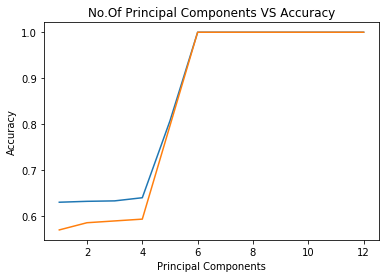

In [599]:
trainAccuracy_keys=[1,2,3,4,5,6,7,8,9,10,11,12]
testAccuracy_keys=[1,2,3,4,5,6,7,8,9,10,11,12]
trainAccuracy = [0.6304985337243402 ,0.6324535679374389,0.6334310850439883 ,0.6402737047898338 ,0.8074291300097751 ,1,1,1,1,1,1,1 ]
testAccracy = [0.5703125,0.5859375,0.58984375,0.59375,0.796875,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
plt.plot(trainAccuracy_keys,trainAccuracy,label="Train Accuracy")
plt.plot(testAccuracy_keys,testAccracy,label="Test Accuracy")
plt.title("No.Of Principal Components VS Accuracy")
plt.xlabel("Principal Components")
plt.ylabel("Accuracy")

In [589]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
x_pca = pca.fit_transform(scaler_train_set)
x_pca

array([[-0.244, -0.831, -0.434, -0.571, -0.514,  0.101],
       [-0.027,  0.102, -1.264, -0.301, -0.529,  0.275],
       [-1.254,  0.319, -2.135,  0.014, -0.007,  1.014],
       ...,
       [-0.927,  0.77 , -1.442, -0.06 ,  0.302,  0.693],
       [-3.175, -1.655,  0.6  , -0.181,  0.208,  0.522],
       [-1.556,  1.359, -0.572, -0.313, -0.124, -0.622]])

# Please Run ALL together from start to run correctly